In [3]:
#Importing necessary liberies needed to analyze our data

import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import tensorflow as tf

import nltk
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data =pd.read_csv(r'/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
print("dataset shape: ", data.shape)

dataset shape:  (1599999, 6)


In [7]:
data.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [8]:
data.rename(columns={'0':'polarity','1467810369':'id','Mon Apr 06 22:19:45 PDT 2009':'date','NO_QUERY':'query','_TheSpecialOne_':'user',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'text'}, inplace=True)

In [9]:
data.head(10)

,polarity,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [10]:
data['polarity'].unique()

array([0, 4])

In [11]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.tail()

,polarity,id,date,query,user,text
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1599999 non-null  int64 
 1   id        1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   user      1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [13]:
data.describe()

,polarity,id
count,1599999.0,1.599999e+06
mean,0.5,1.998818e+09
std,0.5,1.935757e+08
min,0.0,1.467811e+09
25%,0.0,1.956916e+09
50%,1.0,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [14]:
# checking the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print(f'Total length of the data is:         {data.shape[0]}')
print(f'No. of positve tagged sentences is:  {len(positives)}')
print(f'No. of negative tagged sentences is: {len(negatives)}')

Total length of the data is:         1599999
No. of positve tagged sentences is:  800000
No. of negative tagged sentences is: 799999


In [15]:
#checking for duplicated in the dataset
duplicates = data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the duplicate rows
duplicate_rows = data[duplicates]
print(num_duplicates)


0


In [16]:
# get a word count per of text
def word_count(words):
    return len(words.split())

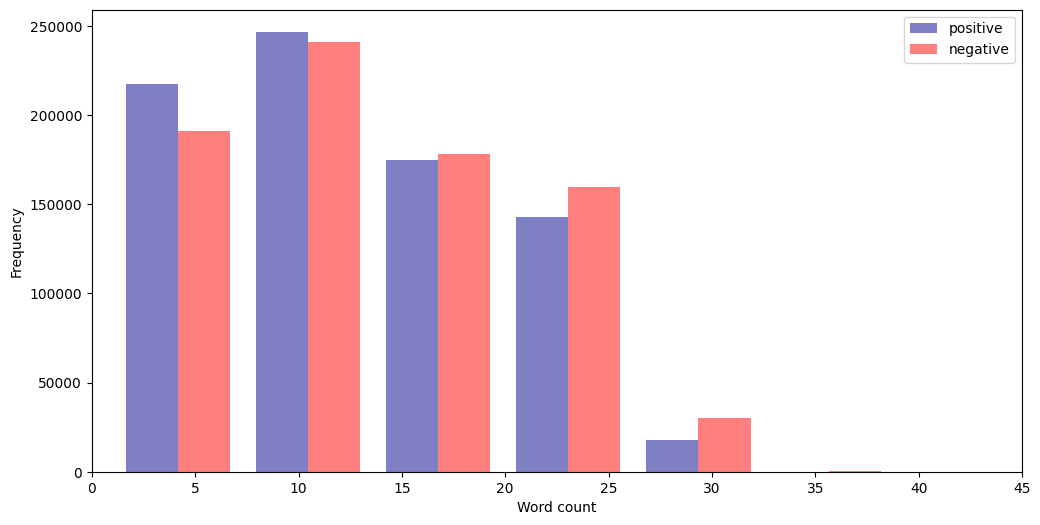

In [17]:
# plotting word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['darkblue','red'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [18]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 518734),
 ('and', 295675),
 ('you', 237765),
 ('for', 214051),
 ('have', 143295),
 ('that', 128775),
 ("i'm", 127616),
 ('but', 124676),
 ('just', 124454),
 ('with', 113488),
 ('was', 102742),
 ('not', 102160),
 ('this', 88151),
 ('get', 80943),
 ('good', 77367),
 ('are', 75994),
 ('like', 75424),
 ('all', 74076),
 ('out', 68953),
 ('your', 64854)]

Data Processing

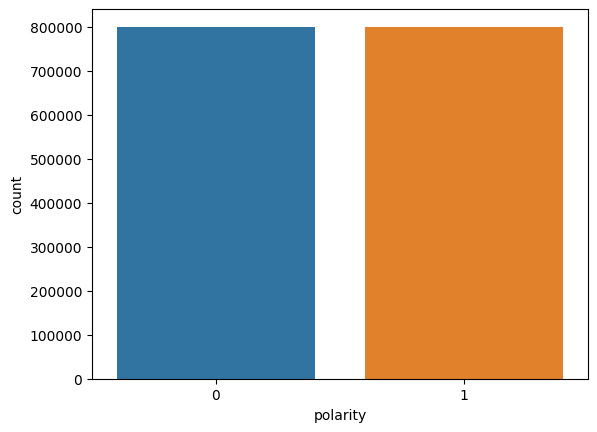

In [19]:
%matplotlib inline
sns.countplot(data=data, x=data['polarity'])
plt.show()

In [20]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [21]:
data.drop('id', axis=1, inplace=True)

In [22]:
data.head()

,polarity,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [23]:
data['polarity'].unique()

array([0, 1])

In [24]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [25]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [26]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'yourself', 'before', "didn't", 'not', 'll', 'our', 'about', 'too', "needn't", 'was', 'doesn', 'weren', 'mightn', 'or', "hadn't", "couldn't", 'ours', 'y', 'these', 'so', 'there', "it's", 'that', 'him', 'own', 'do', 'under', 'her', 'having', 'just', 'some', 'more', 'myself', 'from', 'while', 'on', 'wouldn', "you're", 'same', 'than', 'your', 'and', "aren't", 'isn', 'ma', "mightn't", "shan't", 'the', 'theirs', 'here', 'nor', "weren't", 'very', 'most', 'yourselves', 'those', 'don', 'down', 'did', 'few', 'its', "you'll", 'to', 'each', 'haven', 'if', 'shouldn', "you've", "doesn't", 'again', 'both', 'hers', 'themselves', 'for', 'until', 'any', 'now', 'as', 'why', 'when', 'has', 'into', 'how', 'further', 'am', 'who', 'yours', 'ourselves', 'with', 'it', 'where', 'm', "should've", 'above', 'couldn', 're', 'but', 'wasn', 'he', 'herself', 'won', "wouldn't", 'this', 'other', 'is', 'once', 'we', 'such', 'against', 'over', 'no', 'at', 'them', 'didn', "haven't", 'during', 'out', 'what', 'd', 'me', 'b

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have") Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [27]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [28]:
nltk.download('wordnet')
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')


[nltk_data] Downloading package wordnet to /root/nltk_data...


Text Preprocessing complete.


In [29]:
data.head(10)

,polarity,text,processed_tweets
0,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save 50 ...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see
4,0,@Kwesidei not the whole crew,kwesidei whole crew
5,0,Need a hug,eed hug
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,loltrish hey long time see yes rain bit bit lo...
7,0,@Tatiana_K nope they didn't have it,tatianak nope didnt
8,0,@twittera que me muera ?,twittera que muera
9,0,spring break in plain city... it's snowing,pring break plain city snowing


Analyzing the data

Word-Cloud for Negative tweets

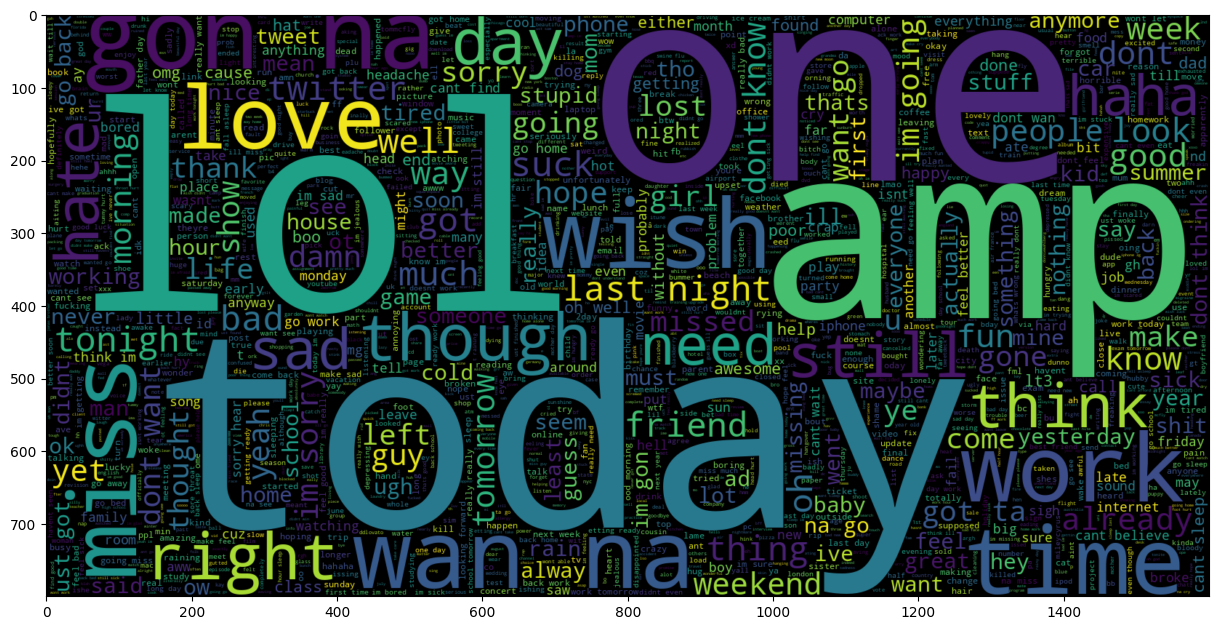

In [30]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

Word-Cloud for Positive tweets.

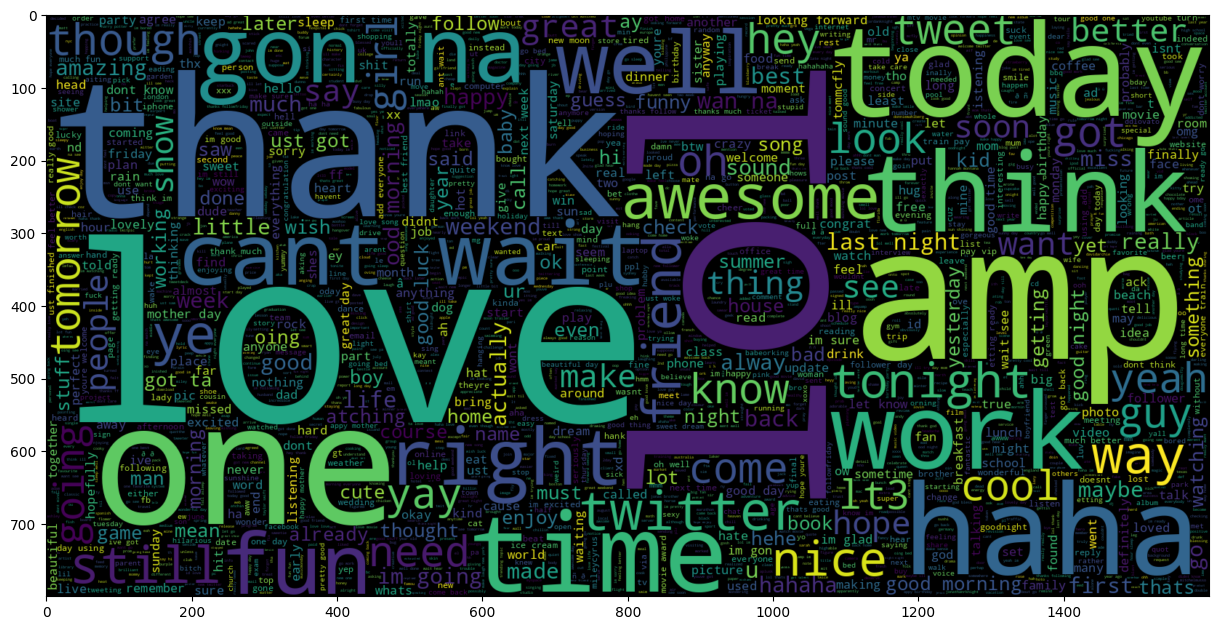

In [31]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

Vectorization and Splitting the data

Storing input variable-processes_tweets to X and output variable-polarity to y

In [32]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [33]:
print(X.shape)
print(y.shape)

(1599999,)
(1599999,)


Convert text to word frequency vectors

TF-IDF

This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document. Inverse Document Frequency: This downscales words that appear a lot across documents.

In [34]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

In [35]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print('Vector fitted.')
print('No. of feature words:', len(vector.vocabulary_))


Vector fitted.
No. of feature words: 762358


In [36]:
print(X.shape)
print(y.shape)

(1599999, 762358)
(1599999,)


Split train and test

The Preprocessed Data is divided into 2 sets of data:

Training Data: The dataset upon which the model would be trained on. Contains 80% data. Test Data: The dataset upon which the model would be tested against. Contains 20% data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=510)

In [38]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1279999, 762358)
y_train (1279999,)

X_test (320000, 762358)
y_test (320000,)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
import re

In [40]:
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   11  187 1283]
 [   0    0    0 ...  368    6 3132]
 [   0    0    0 ... 2957    5 1043]
 ...
 [   0    0    0 ...  123  504 1746]
 [   0    0    0 ...  415 4997   12]
 [   0    0    0 ...    0    0  458]]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [42]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("sent_ana.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/5
39999/40000 [============================>.] - ETA: 0s - loss: 0.4725 - accuracy: 0.7727
Epoch 1: val_accuracy improved from -inf to 0.78296, saving model to sent_ana.hdf5
40000/40000 [==============================] - 481s 12ms/step - loss: 0.4725 - accuracy: 0.7727 - val_loss: 0.4553 - val_accuracy: 0.7830
Epoch 2/5
39997/40000 [============================>.] - ETA: 0s - loss: 0.4525 - accuracy: 0.7857
Epoch 2: val_accuracy improved from 0.78296 to 0.78539, saving model to sent_ana.hdf5
40000/40000 [==============================] - 444s 11ms/step - loss: 0.4525 - accuracy: 0.7857 - val_loss: 0.4514 - val_accuracy: 0.7854
Epoch 3/5
40000/40000 [==============================] - ETA: 0s - loss: 0.4469 - accuracy: 0.7889
Epoch 3: val_accuracy improved from 0.78539 to 0.78640, saving model to sent_ana.hdf5
40000/40000 [==============================] - 442s 11ms/step - loss: 0.4469 - accuracy: 0.7889 - val_loss: 0.4508 - val_accuracy: 0.7864
Epoch 4/5
39998/40000 [===========

In [43]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 367ms/step
Negative


In [46]:
sequence = tokenizer.texts_to_sequences(['he love the work'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 33ms/step
Positive


In [48]:
from google.colab import files

# Define the path to the saved model file
model_file_path = 'sent_ana.hdf5'

# Download the model file
files.download(model_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>